# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження даних
df = pd.read_csv('/content/yulu_bike_sharing_dataset.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour


---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [2]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)

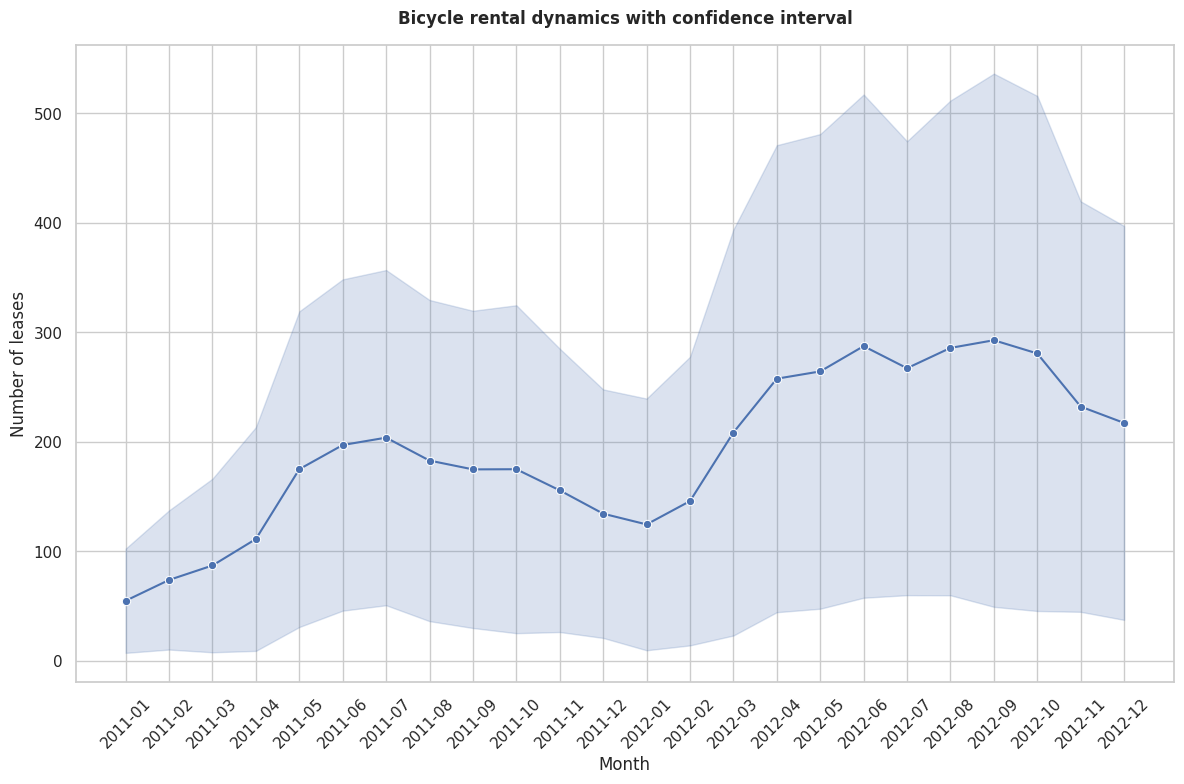

In [3]:
plt.figure(figsize=(12, 8))

sns.lineplot(
    data=df,
    marker='o',
    x='month_year',
    y='count',
    errorbar='sd',
)

plt.title('Bicycle rental dynamics with confidence interval', fontweight='bold', y=1.02)
plt.xlabel('Month')
plt.ylabel('Number of leases')

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

In [4]:
# TOP 3 months with the greatest uncertainty (standard deviation of rent)
std_by_month = df.groupby('month_year')['count'].std().reset_index()
std_by_month.columns = ['month_year', 'std']

top_std_months = std_by_month.sort_values(by='std', ascending=False).round(2).head(3)
top_std_months

,month_year,std
20,2012-09,243.51
21,2012-10,235.21
17,2012-06,229.81


The months with the highest uncertainty in bicycle rentals — as indicated by the widest confidence intervals — are likely influenced by a greater variability in daily rental counts. This could be due to:
- Unstable weather conditions that affect outdoor activity,
-  Holidays or special events that temporarily boost or reduce demand,
- Sudden changes in user behavior or demand patterns,
- Or simply a smaller number of observations, which increases the standard deviation.

Understanding these fluctuations is important for improving demand forecasting and operational planning.

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

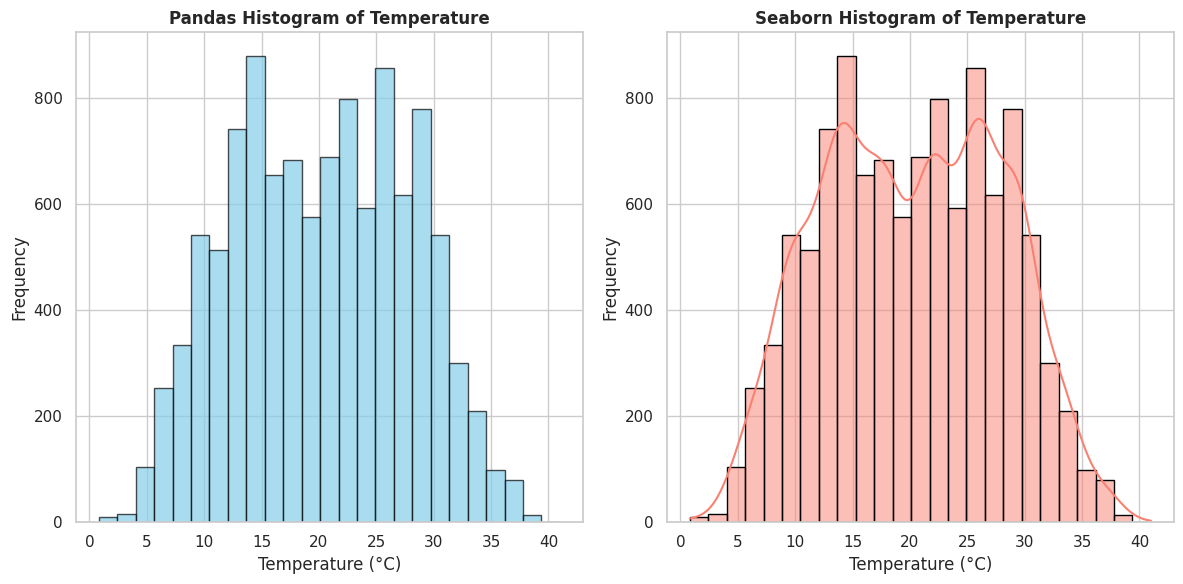

In [5]:
plt.figure(figsize=(12, 6))

# Histogram Pandas
plt.subplot(1, 2, 1)
df['temp'].plot.hist(
    bins=25,
    alpha=0.7,
    color='skyblue',
    edgecolor='black'
    )

plt.title('Pandas Histogram of Temperature', fontweight='bold')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

# Histogram Seaborn
plt.subplot(1, 2, 2)
sns.histplot(
    data=df,
    x='temp',
    bins=25,
    kde=True,
    color='salmon',
    edgecolor='black'
    )

plt.title('Seaborn Histogram of Temperature', fontweight='bold')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

1.
 **Pandas:**
- Simple and basic style.
- Fewer customization options.
- Only bars — no additional elements by default.

 **Seaborn:**
- More modern and visually appealing.
- More styling options (colors, transparency, KDE support, etc.).
- By default, includes a density line (KDE), making the chart more informative.

2. KDE line (Kernel Density Estimate).It represents a smooth estimation of the data distribution, compared to the jagged bars of a histogram. You can think of it as a smoothed version of the distribution curve, helping to see where values are concentrated.

## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

In [6]:
# Map for names
weather_map = {
    1: 'Clear',
    2: 'Cloudy',
    3: 'Light Rain',
    4: 'Heavy Rain'
}

# Creating a categorical variable with order
weather_order = ['Clear', 'Cloudy', 'Light Rain', 'Heavy Rain']

df_viz = df.copy()
df_viz['weather_label'] = pd.Categorical(
    df_viz['weather'].map(weather_map),
    categories=weather_order,
    ordered=True
)

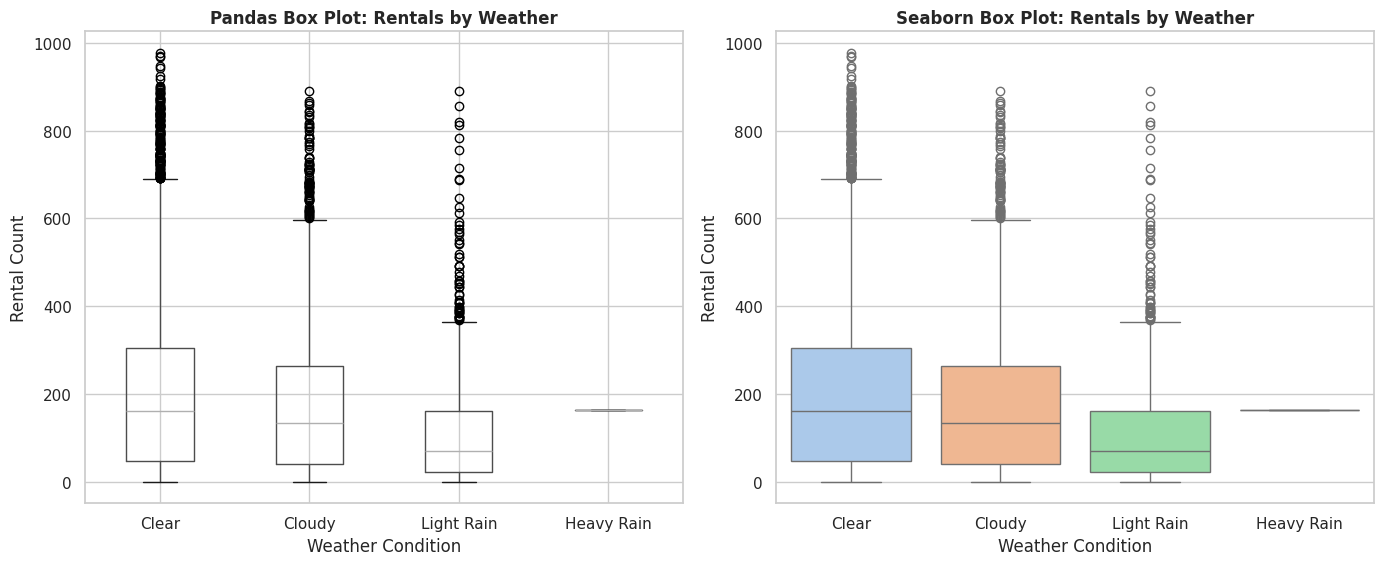

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot Pandas
df_viz.boxplot(
    column='count',
    by='weather_label',
    ax=axs[0]
)

axs[0].set_title('Pandas Box Plot: Rentals by Weather', fontweight='bold')
axs[0].set_xlabel('Weather Condition')
axs[0].set_ylabel('Rental Count')
fig.suptitle('')

# Boxplot Seaborn
sns.boxplot(
    data=df_viz,
    x='weather_label',
    y='count',
    hue='weather_label',
    palette='pastel',
    legend=False,
    ax=axs[1]
)

axs[1].set_title('Seaborn Box Plot: Rentals by Weather', fontweight='bold')
axs[1].set_xlabel('Weather Condition')
axs[1].set_ylabel('Rental Count')

plt.tight_layout()
plt.show()

Pandas: standard style, less customizable, looks more basic or raw; harder to style with colors or fonts.

Seaborn: more aesthetic and flexible. Automatically includes colors, smoother lines, and better label handling.

Seaborn is better suited for analytical reports and presentations.

<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


In [8]:
correlation = df[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

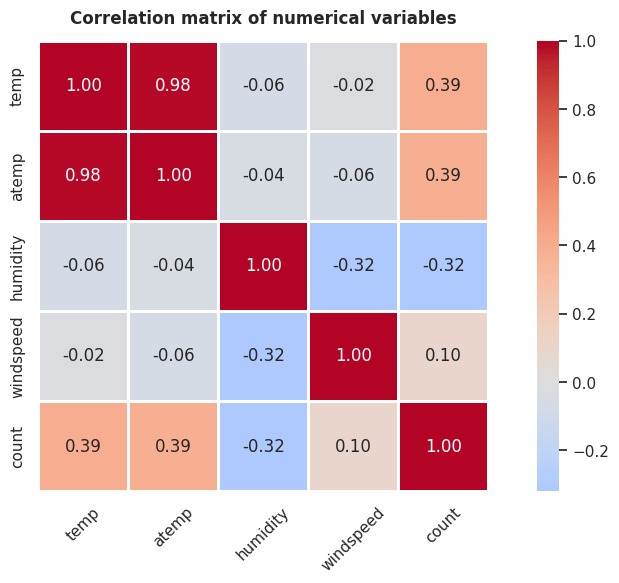

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation,
    annot=True,
    fmt=".2f",
    center=0,
    cmap='coolwarm',
    square=True,
    linewidths=1
    )

plt.title('Correlation matrix of numerical variables', fontweight='bold', y=1.02)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

1. The strongest positive correlations are with:
- temp: correlation coefficient ≈ 0.39
- atemp: correlation coefficient ≈ 0.39

 This means that higher temperatures tend to lead to more bike rentals.

2. Correlation between temp and atemp is 0.98, indicating an almost perfect linear relationship. This is expected because atemp is derived from temp, adjusting for humidity and wind, hence they move nearly identically.

3. Variables show a negative correlation:
- humidity: -0.32 — Higher humidity tends to reduce bike rental demand.
- windspeed: ≈ 0.10, which is a very weak positive correlation (almost none).
  
  Therefore, humid weather significantly suppresses rentals.

## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за сезонами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому сезоні найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


In [10]:
season_map = {
    1: 'Spring',
    2: 'Summer',
    3: 'Autumn',
    4: 'Winter'
}

df['season_label'] = df['season'].map(season_map)

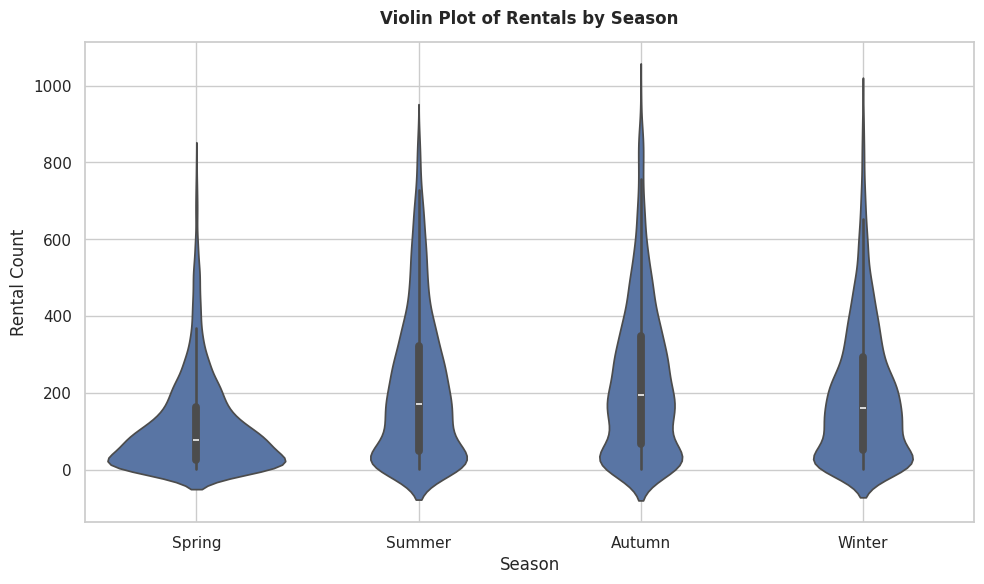

In [11]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df,
    x='season_label',
    y='count',
    )

plt.title('Violin Plot of Rentals by Season', fontweight='bold', y=1.02)
plt.xlabel('Season')
plt.ylabel('Rental Count')

plt.grid(True)
plt.tight_layout()
plt.show()

1. The "thickness" of the violin plot shows the density of the data distribution. The wider the section of the violin at a certain value, the more observations (rental counts) are concentrated around that value. It helps to visualize where the data points are most frequent.

2. The Autumn season exhibits the highest variability in rental counts. This is evident from the widest and most stretched violin shape, indicating a wide range of rental values — from low to high.

3. Violin plots combine the benefits of a box plot and kernel density estimation:
- They show not only the median, quartiles, and range (like box plots), but also the shape of the distribution.
- Help identify skewness or symmetry in the data.
- Reveal multi-modal distributions (multiple peaks), which standard box plots cannot detect.

## Завдання 6: Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте сезон.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше змінюється від сезону?

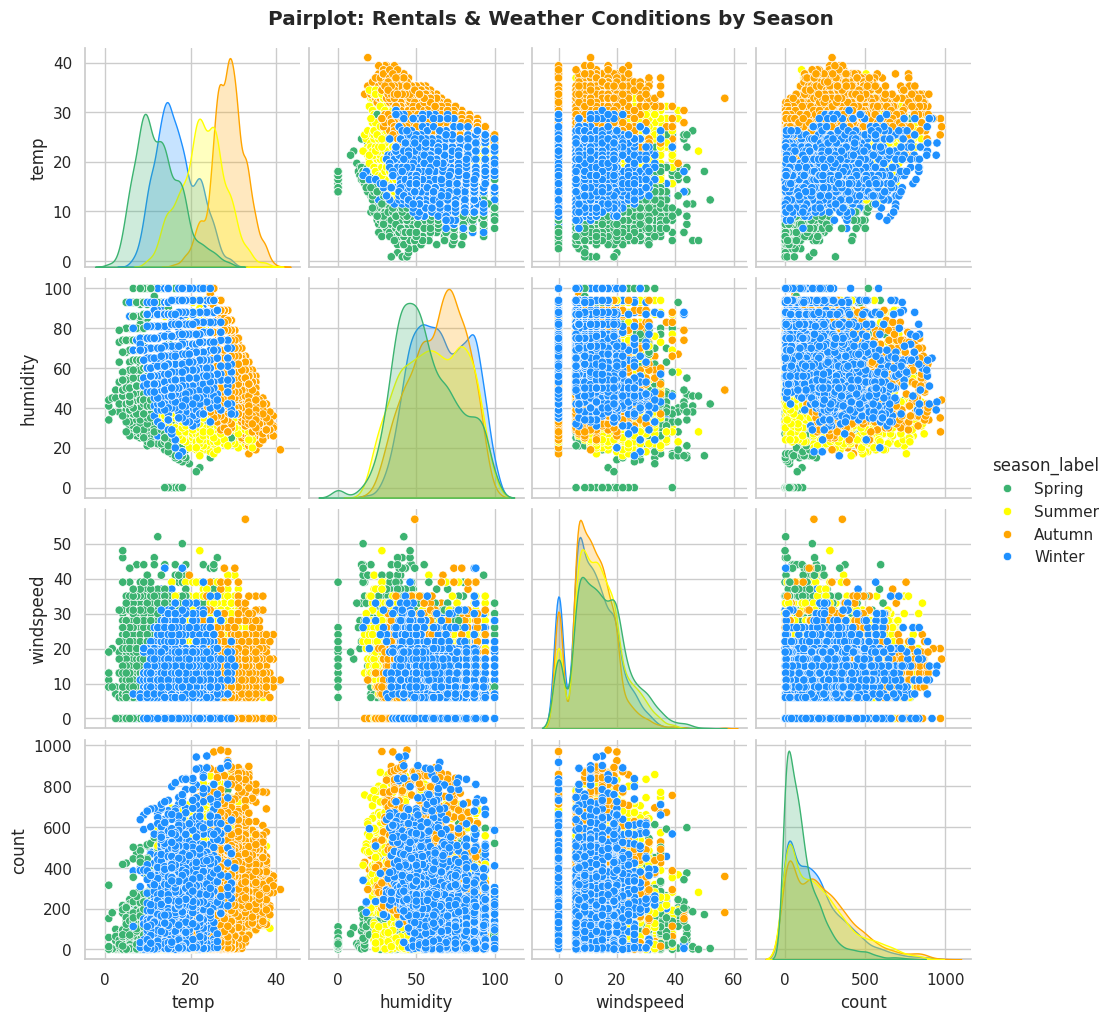

In [13]:
sns.pairplot(
    data=df,
    vars=['temp', 'humidity', 'windspeed', 'count'],
    hue='season_label',
    palette=['mediumseagreen', 'yellow', 'orange', 'dodgerblue']
)

plt.suptitle('Pairplot: Rentals & Weather Conditions by Season', fontweight='bold', y=1.02)
plt.show()

1.  The strongest linear relationship is observed between temperature (`temp`) and rental count (`count`). Data points clearly form an upward trend: the higher the temperature, the more bike rentals, especially in Spring, Summer, and Autumn.

2. The most seasonally variable feature is temperature (`temp`):
- Winter values are the lowest (blue dots).
- Summer temperatures are the highest (yellow dots).

 Humidity also shows some variation, but it's less pronounced.

 `Windspeed` does not show a clear linear relationship with `count`. Rental density is observed around average temperatures in the summer, indicating optimal conditions for bicycle use.


## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

In [14]:
workingday_label = {
    0: 'Day Off',
    1: 'Working Day',
}

df['workingday_label'] = df['workingday'].map(workingday_label)

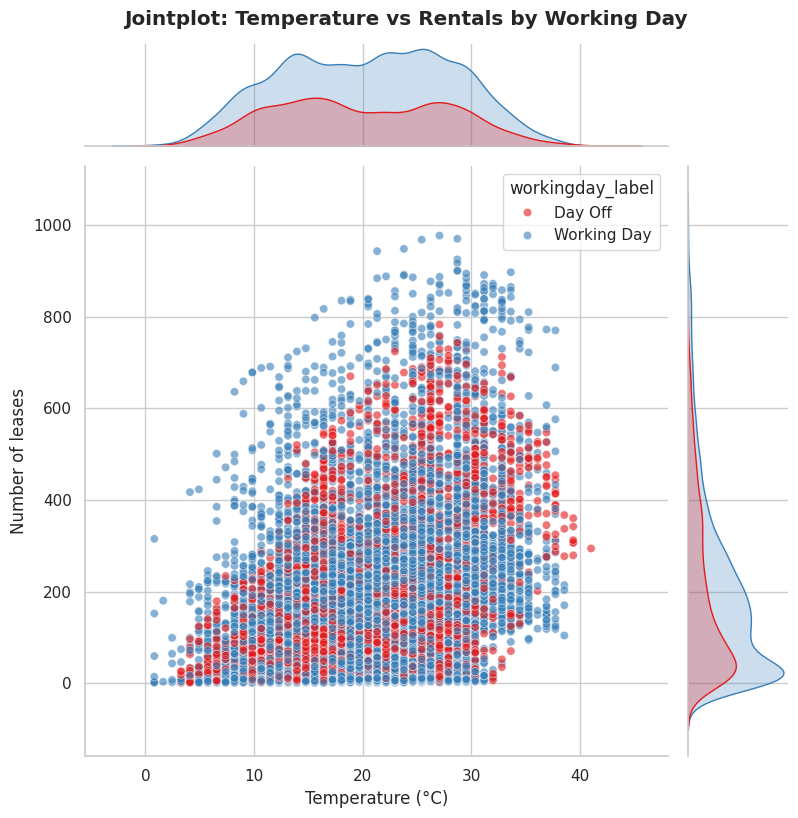

In [15]:
sns.jointplot(
    data=df,
    x='temp',
    y='count',
    hue='workingday_label',
    height=8,
    palette='Set1',
    alpha=0.6
)

plt.suptitle('Jointplot: Temperature vs Rentals by Working Day', fontweight='bold', y=1.02)
plt.xlabel('Temperature (°C)')
plt.ylabel('Number of leases')

plt.show()


1. The top plot shows the temperature distribution for working days (blue) and days off (red).
The right-hand plot shows the distribution of rental counts depending on the day type.

2. Working days (blue points) show a denser cluster of rentals, especially between 15°C and 30°C, indicating regular commuting usage.

 Days off (red points) show a flatter distribution with fewer rentals at any given temperature, suggesting more casual or leisure-oriented use.

 Temperature affects rentals in both day types, but demand is more concentrated and sharply increases during working days in the optimal temperature range.
